In [110]:
import torch
import torchvision
import time
import random
import math
import json

from PIL import Image, ImageFont, ImageDraw

In [111]:
im = Image.open('./Test_Pictures/A_rhodesian-ridgeback.jpg')
To_Tensor = torchvision.transforms.ToTensor()
tensor_dog = To_Tensor(im).unsqueeze(0)
print(tensor_dog.shape)

torch.Size([1, 3, 619, 1100])


In [112]:
"""
model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(
    weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT,
    box_detections_per_img=100
)
model.train()
"""

'\nmodel = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(\n    weights=torchvision.models.detection.FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT,\n    box_detections_per_img=100\n)\nmodel.train()\n'

In [113]:
#print(model.cpu()(tensor_dog))
#print(model.cpu()(tensor_dog,[{'boxes':torch.FloatTensor([[0,0,10,10]]), 'labels':torch.zeros(1).long()}]))

In [114]:

targets_test = [
    {'boxes':torch.FloatTensor([[0,0],[0,0]]), 'labels':torch.LongTensor([1,0,0,0])}
]

In [125]:
alphabet = ['*','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
random.seed(100)
alphabetColors = [(random.randrange(256),random.randrange(256),random.randrange(256)) for i in alphabet]
def displayCoords(image, coords, labels):
    font = ImageFont.truetype("meiryo.ttc", 20)
    imageCopy = image.copy()
    draw = ImageDraw.Draw(imageCopy)
    for i in range(len(coords)):
        coord = coords[i]
        label = labels[i]
        x1 = coord[0]
        y1 = coord[1]
        x2 = coord[2]
        y2 = coord[3]
        color = alphabetColors[label]
        
        draw.rectangle([x1,y1,x2,y2], outline=color, width=2)
        draw.text((x1+2,y1), alphabet[label], color, font=font)
        
    display(imageCopy)

In [116]:
def createImage(pixelSize=(600,600), labels=[], nPerturbs=5, font=None, yBaseOffset=0,angle=0,seed=0) -> Image:
    random.seed(seed)
    
    
    info = {'boxes' : [], 'labels' : []}
    padding = 5
    
    foreground=(random.randrange(256),random.randrange(256),random.randrange(256), 255)
    background=(random.randrange(256),random.randrange(256),random.randrange(256))
    
    distance = abs(foreground[0]+foreground[1]+foreground[2]-background[0]-background[1]-background[2])
    modif = 255//(distance+1)
    background=(background[0]*modif,background[1]*modif,background[2]*modif)
    
    baseFontSize = font.size
    
    image1 = Image.new(mode='RGBA', size=pixelSize, color=(255,255,255,0))
    background1 = Image.new(mode='RGB', size=pixelSize, color=background)
    
    draw1 = ImageDraw.Draw(image1)
    
    
    perturb_font = ImageFont.truetype("arial.ttf", baseFontSize)
    perturb_foreground=(random.randrange(256),random.randrange(256),random.randrange(256), 255)
    perturbs = [alphabet[random.randrange(len(alphabet))] for i in range(nPerturbs)]
    
    #Draw perturbations
    for perturb in perturbs:
        x0,y0,width,height = perturb_font.getbbox(perturb)
        
        fontSize = baseFontSize
        randXOffset = random.randrange(pixelSize[0] - fontSize)
        randYOffset = random.randrange(pixelSize[1] - fontSize)
        fontOffsetX = randXOffset
        fontOffsetY = yBaseOffset*fontSize + randYOffset
        draw1.text((fontOffsetX,fontOffsetY), perturb, perturb_foreground, font=perturb_font)
        info['boxes'].append([
            randXOffset-padding, 
            fontOffsetY-padding, 
            randXOffset+width+padding, 
            fontOffsetY+height+padding
        ])
        info['labels'].append(0) #0 is for background
    
    #Draw Glyphs
    for label in labels:
        symbol = alphabet[label]
        x0,y0,width,height = font.getbbox(symbol)
        
        fontSize = baseFontSize
        randXOffset = random.randrange(pixelSize[0] - fontSize)
        randYOffset = random.randrange(pixelSize[1] - fontSize)
        fontOffsetX = randXOffset
        fontOffsetY = yBaseOffset*fontSize + randYOffset
        draw1.text((fontOffsetX,fontOffsetY), symbol, foreground, font=font)
        info['boxes'].append([
            randXOffset-padding, 
            fontOffsetY-padding, 
            randXOffset+width+padding, 
            fontOffsetY+height+padding
        ])
        info['labels'].append(label+1) #0 is for background
    
    
    
    sampling = Image.Resampling.BICUBIC
    
    image_rot = background1.copy()
    image_rot.paste(image1.rotate(angle,sampling), (0, 0), image1.rotate(angle,sampling).split()[-1])
    
    #image_rot.show()
    return image_rot, info

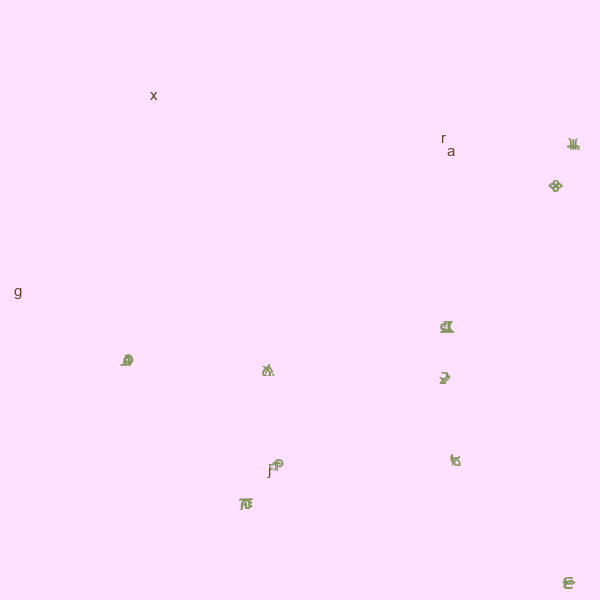

In [117]:
img_test,_ = createImage(
    labels=[0,1,2,3,4,5,6,7,8,9],
    nPerturbs=5,
    font=ImageFont.truetype("./Fonts/SoulGlyph.ttf", 15),
    yBaseOffset=0.0,
    seed=13
)

display(img_test)

#img_test.save("./Test_Pictures/Test1.jpeg")

In [118]:
alphaSpace = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',' ',' ',' ',' ',' ']
def createWordImage(pixelSize=(600,600), nPerturbs=5, font=None, yBaseOffset=0,angle=0,seed=0) -> Image:
    random.seed(seed)
    
    info = {'boxes' : [], 'labels' : []}
    padding = 5
    
    foreground=(random.randrange(256),random.randrange(256),random.randrange(256), 255)
    background=(random.randrange(256),random.randrange(256),random.randrange(256))
    
    distance = abs(foreground[0]+foreground[1]+foreground[2]-background[0]-background[1]-background[2])
    modif = 255//(distance+1)
    background=(background[0]*modif,background[1]*modif,background[2]*modif)
    
    baseFontSize = font.size
    
    image1 = Image.new(mode='RGBA', size=pixelSize, color=(255,255,255,0))
    background1 = Image.new(mode='RGB', size=pixelSize, color=background)
    
    draw1 = ImageDraw.Draw(image1)
    
    
    perturb_font = ImageFont.truetype("arial.ttf", baseFontSize)
    perturb_foreground=(random.randrange(256),random.randrange(256),random.randrange(256), 255)
    perturbs = [alphabet[random.randrange(len(alphabet))] for i in range(nPerturbs)]
    """
    #Draw perturbations
    for perturb in perturbs:
        x0,y0,width,height = perturb_font.getbbox(perturb)
        
        fontSize = baseFontSize
        randXOffset = random.randrange(pixelSize[0] - fontSize)
        randYOffset = random.randrange(pixelSize[1] - fontSize)
        fontOffsetX = randXOffset
        fontOffsetY = yBaseOffset*fontSize + randYOffset
        draw1.text((fontOffsetX,fontOffsetY), perturb, perturb_foreground, font=perturb_font)
    """
    
    #Draw Glyphs
    nx = (pixelSize[0]-2*padding)//baseFontSize
    ny = (pixelSize[1]-2*padding)//baseFontSize
    
    y=padding
    for j in range(ny):
        x=padding
        for i in range(nx):
            label = random.randrange(len(alphaSpace))
            symbol = alphaSpace[label]
            
            x0,y0,width,height = font.getbbox(symbol)
        
            fontSize = baseFontSize
            
            fontOffsetY = yBaseOffset*fontSize
            draw1.text((x,y+fontOffsetY), symbol, foreground, font=font)
            
            if label < len(alphabet):
                info['boxes'].append([
                    x-padding, 
                    y-padding, 
                    x+width+padding, 
                    y+height+padding
                ])
                info['labels'].append(label+1) #0 is for background
            
            x+=width
        y+=fontSize
    
    
    
    
    sampling = Image.Resampling.BICUBIC
    
    image_rot = background1.copy()
    image_rot.paste(image1.rotate(angle,sampling), (0, 0), image1.rotate(angle,sampling).split()[-1])
    
    #image_rot.show()
    return image_rot, info

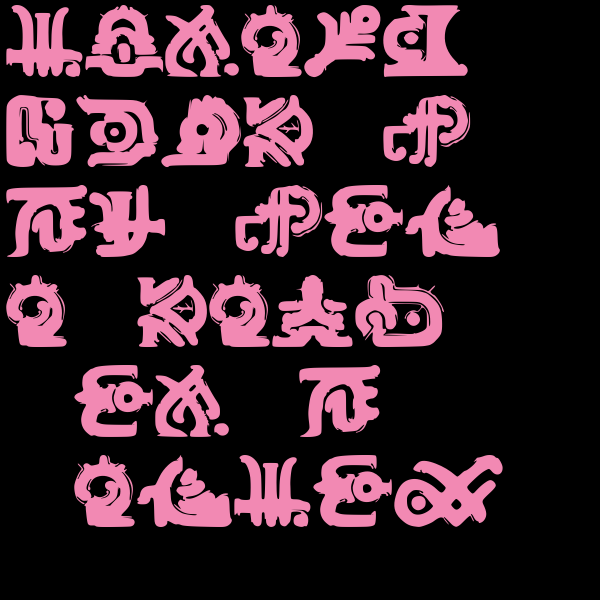

In [119]:
img_test2,_ = createWordImage(
    nPerturbs=5,
    font=ImageFont.truetype("./Fonts/SoulGlyph.ttf", 90),
    yBaseOffset=0.0,
    seed=12
)

display(img_test2)

In [120]:
def createTrainingSet():
    
    start = time.time()
    nb_images = 2000
    list_info = []
    for i in range(nb_images):
        random.seed(420+i)
        pixelSize = (random.randrange(300,600),random.randrange(300,600))
        
        nbSelected = random.randrange(4,13)
        nPerturbs = random.randrange(4,13)
        labels = [random.randrange(0,26) for i in range(nbSelected)]
        #letters = [alphabet[i] for i in labels]
        
        if random.randrange(2)==0:
            fontSize = random.randrange(15,60)
            img, info = createImage(
                pixelSize=pixelSize,
                labels=labels,
                nPerturbs=nPerturbs,
                font=ImageFont.truetype("./Fonts/SoulGlyph.ttf", fontSize),
                yBaseOffset=0,
                seed=i
            )
        else:
            fontSize = random.randrange(40,90)
            img, info = createWordImage(
                pixelSize=pixelSize,
                nPerturbs=nPerturbs,
                font=ImageFont.truetype("./Fonts/SoulGlyph.ttf", fontSize),
                yBaseOffset=0,
                seed=i
            )
        #info['labels'].extend(labels)
        
        
        info['image']="./Test_Pictures/Image_" + str(i) + ".jpeg"
        img.save(info['image'])
        list_info.append(info)
        
        if i%100==99:
            end = time.time()
            ratio = i/nb_images
            dt = end-start
            expected_time = math.floor(dt*((1-ratio)/ratio))

            percent = 100*ratio
            percent = math.floor(100*percent)/100
            print(str(percent)+"% of pictures generated. Estimated time left : " 
                  + str(expected_time//60) + "m " + str(expected_time%60) + "s")
            
    with open('targets.json', 'w', encoding="utf-8") as outfile:
        json.dump(list_info, outfile, indent=4)
            
    print("100% of pictures generated.")

In [121]:
createTrainingSet()

4.95% of pictures generated. Estimated time left : 0m 14s
9.95% of pictures generated. Estimated time left : 0m 13s
14.95% of pictures generated. Estimated time left : 0m 13s
19.95% of pictures generated. Estimated time left : 0m 12s
24.95% of pictures generated. Estimated time left : 0m 11s
29.95% of pictures generated. Estimated time left : 0m 11s
34.94% of pictures generated. Estimated time left : 0m 10s
39.95% of pictures generated. Estimated time left : 0m 9s
44.95% of pictures generated. Estimated time left : 0m 8s
49.95% of pictures generated. Estimated time left : 0m 7s
54.95% of pictures generated. Estimated time left : 0m 7s
59.95% of pictures generated. Estimated time left : 0m 6s
64.95% of pictures generated. Estimated time left : 0m 5s
69.95% of pictures generated. Estimated time left : 0m 4s
74.95% of pictures generated. Estimated time left : 0m 3s
79.95% of pictures generated. Estimated time left : 0m 3s
84.95% of pictures generated. Estimated time left : 0m 2s
89.95% of

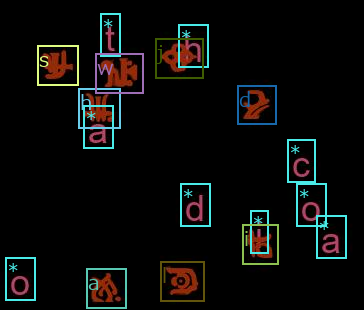

In [126]:
with open('targets.json', 'r', encoding="utf-8") as f:
    image_nb = 23
    infos = json.load(f)
    test_img = Image.open(infos[image_nb]['image'])
    displayCoords(test_img, infos[image_nb]['boxes'], infos[image_nb]['labels'])
    